In [ ]:
# https://plainenglish.io/blog/how-can-we-upload-data-to-google-colab-ef31394b004a



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/545/Crime_Data_from_2020_to_Present.csv")
# my csv is in a file called 545 under my drive

Size of dataset

In [ ]:
num_rows, num_cols = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 743817
Number of columns: 28


Top crime counts

In [ ]:
df.head()

unique_values = df.groupby('Crm Cd')['Crm Cd Desc'].unique().reset_index()
crime_counts = df['Crm Cd'].value_counts().reset_index()
crime_counts.columns = ['Crm Cd', 'count']

unique_crime_counts_df = pd.merge(unique_values, crime_counts, on='Crm Cd', how='left').sort_values(by='count', ascending=False)
unique_crime_counts_df.head(5).reset_index(drop=True)


,Crm Cd,Crm Cd Desc,count
0,510,[VEHICLE - STOLEN],100225
1,624,[BATTERY - SIMPLE ASSAULT],73759
2,354,[THEFT OF IDENTITY],57539
3,330,[BURGLARY FROM VEHICLE],57538
4,310,[BURGLARY],57015


['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT', 'LON']

Data types of columns:
DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCAT

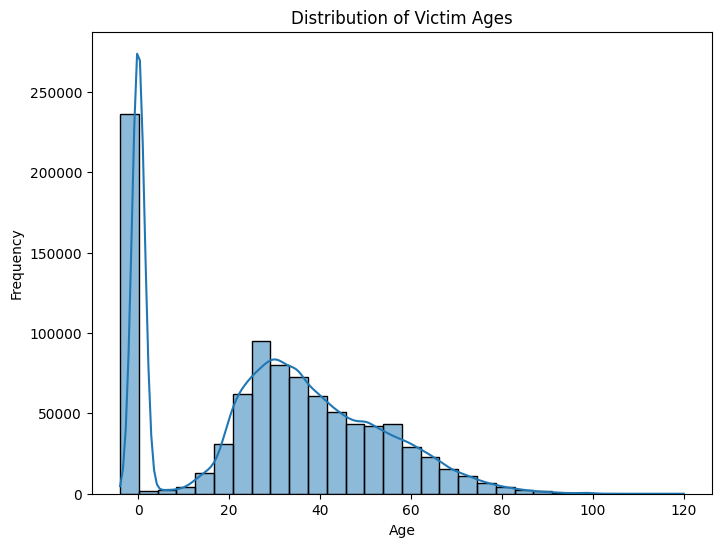

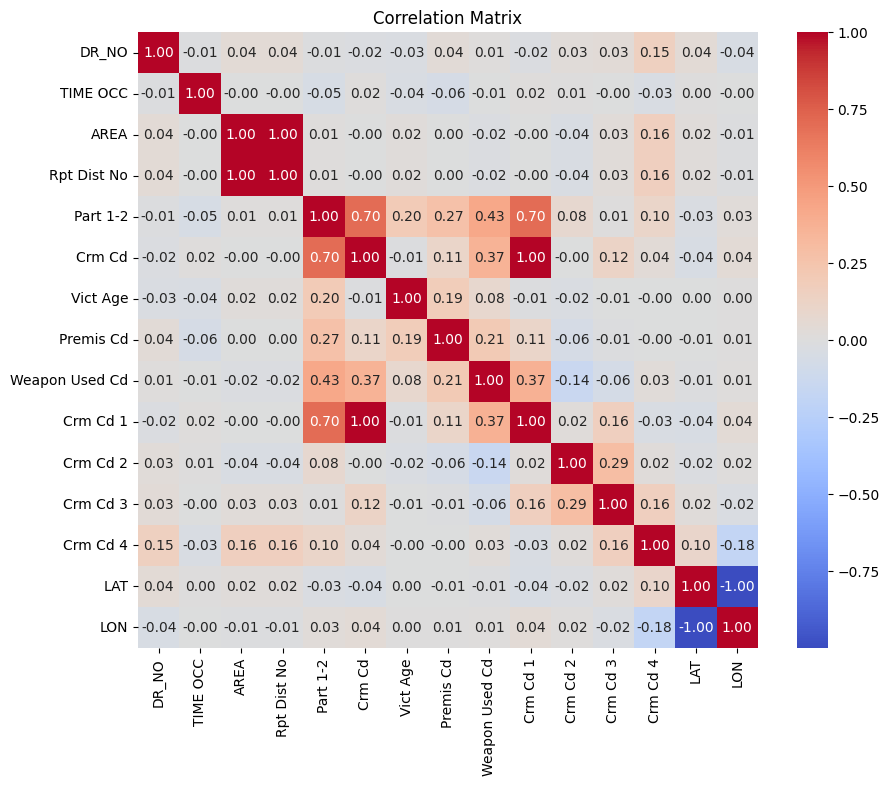

In [ ]:
df_copy = df.copy()
print(df_copy.columns.tolist())

# Look at data types of columns
print("\nData types of columns:")
print(df_copy.dtypes)


df_copy.rename(columns={'Crm Cd Desc': 'Crime Type'}, inplace=True)

# Print df.head()
print("\nDataFrame head:")
print(df_copy.head())

# Print number of unique values in a given column
# we want to check unique values in the 'Area Name' column
print("\nNumber of unique values in 'Area Name' column:", df_copy['AREA NAME'].nunique())

# Look at number of null values and number of duplicate rows (drop if necessary)
print("\nNumber of null values in each column:")
print(df_copy.isnull().sum())

print("\nNumber of duplicate rows:", df.duplicated().sum())

# If you want to drop duplicates
df_copy.drop_duplicates(inplace=True)

# Make a box plot or histogram to see distribution of a given column
# Let's make a histogram for the 'Vict Age' column

plt.figure(figsize=(8, 6))
sns.histplot(df_copy['Vict Age'], bins=30, kde=True)
plt.title("Distribution of Victim Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

numeric_df = df_copy.select_dtypes(include=['float64', 'int64'])

# Plot correlation matrix for all columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Crime distribution by area

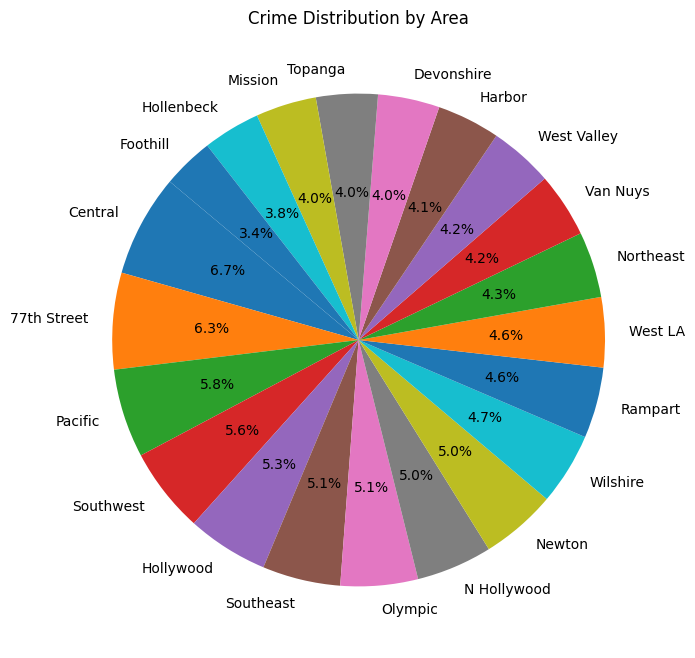

In [ ]:
# Aggregate the data to count the number of crimes in each area
crime_distribution = df['AREA NAME'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 8))
crime_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Crime Distribution by Area')
plt.ylabel('')
plt.show()

Time series plot of crime incidents

<ipython-input-9-03f4a7603cdd>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])


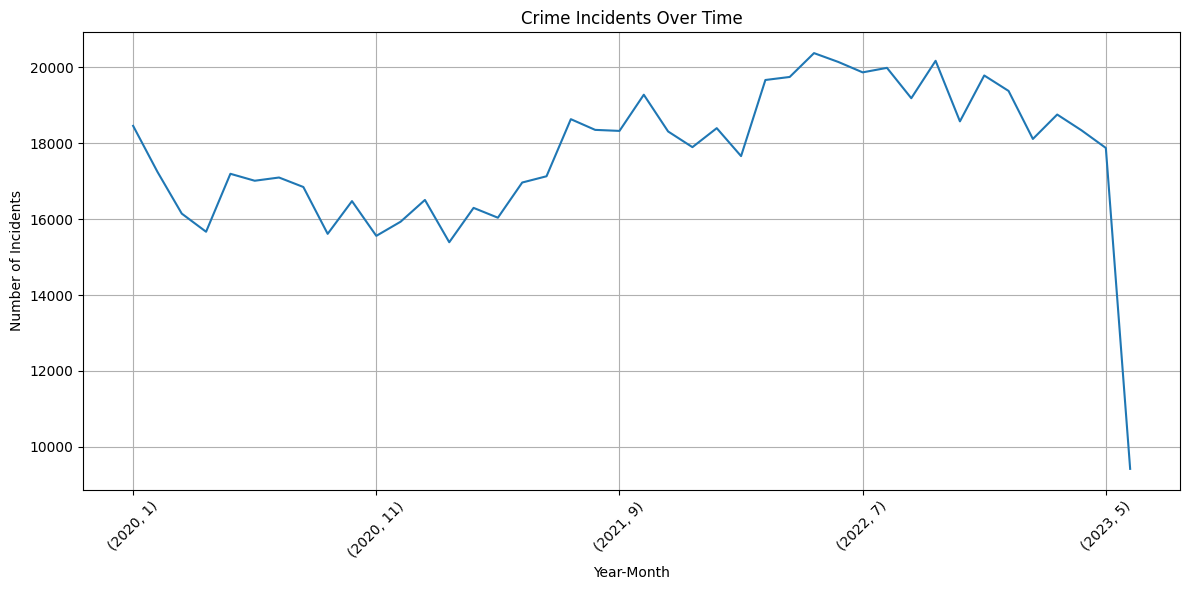

In [ ]:
# Convert the 'Date Occurred' column to datetime format if it's not already
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

# Extract year and month from the 'Date Occurred' column
df['Year'] = df['DATE OCC'].dt.year
df['Month'] = df['DATE OCC'].dt.month

# Aggregate the data to count the number of crime incidents by year and month
crime_incidents_over_time = df.groupby(['Year', 'Month']).size()

# Plot the time series
plt.figure(figsize=(12, 6))
crime_incidents_over_time.plot()
plt.title('Crime Incidents Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Crime distribution by area and crime type

1.   List item
2.   List item



In [ ]:
# Aggregate the data to count the number of occurrences of each crime type in each area
crime_distribution_by_area = df.groupby(['AREA NAME', 'Crm Cd']).size().unstack()

# Plot the stacked bar plot
plt.figure(figsize=(12, 8))
crime_distribution_by_area.plot(kind='bar', stacked=True)
plt.title('Crime Distribution by Area and Crime Type')
plt.xlabel('Area')
plt.ylabel('Number of Incidents')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

violent crime codes from handbook

In [ ]:
# violent crime codes as identified by UCR reporting crime codes handbook
# 110 113 121 122 815 820 821 210 220 230 231 235 236 250 251 761 926
# 435 436 437 622 623 624 625 626 627 647 763 928 930
violent_crimes = [110, 113, 121, 122, 815, 820, 821, 210, 220, 230, 231, 235, 236, 250, 251, 761, 926,
 435, 436, 437, 622, 623, 624, 625, 626, 627, 647, 763, 928, 930]
violent_crimes_df = df[df['Crm Cd'].isin(violent_crimes)]
violent_crimes_df = violent_crimes_df[['Vict Age', 'Vict Sex', 'Vict Descent', 'Crm Cd', 'Crm Cd Desc']].reset_index(drop=True)
violent_crimes_df

,Vict Age,Vict Sex,Vict Descent,Crm Cd,Crm Cd Desc
0,26,M,H,624,BATTERY - SIMPLE ASSAULT
1,8,F,H,821,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...
2,31,F,O,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"
3,30,F,W,930,CRIMINAL THREATS - NO WEAPON DISPLAYED
4,24,F,O,624,BATTERY - SIMPLE ASSAULT
...,...,...,...,...,...
276894,52,F,H,210,ROBBERY
276895,45,M,H,210,ROBBERY
276896,18,M,H,761,BRANDISH WEAPON
276897,36,M,H,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"


property crime codes from handbook


In [ ]:
# property crime codes

property_crimes = [310, 320, 510, 520, 433, 330, 331, 410, 420, 421, 350, 351, 352, 353, 450, 451, 452, 453, 341, 343, 345,
 440, 441, 442, 443, 444, 445, 470, 471, 472, 473, 474, 475, 480, 485, 487, 491]
property_crimes_df = df[df['Crm Cd'].isin(property_crimes)]
property_crimes_df = property_crimes_df[['Vict Age', 'Vict Sex', 'Vict Descent', 'Crm Cd', 'Crm Cd Desc']].reset_index(drop=True)
property_crimes_df

,Vict Age,Vict Sex,Vict Descent,Crm Cd,Crm Cd Desc
0,0,M,O,510,VEHICLE - STOLEN
1,47,M,O,330,BURGLARY FROM VEHICLE
2,19,X,X,480,BIKE - STOLEN
3,19,M,O,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER)
4,0,NaN,NaN,510,VEHICLE - STOLEN
...,...,...,...,...,...
410245,0,NaN,NaN,510,VEHICLE - STOLEN
410246,0,NaN,NaN,510,VEHICLE - STOLEN
410247,59,M,W,410,"BURGLARY FROM VEHICLE, ATTEMPTED"
410248,36,M,W,330,BURGLARY FROM VEHICLE


from the violent crimes df
what makes someone more likely to be victim of a sexual crime - out of all violent crimes

descent mapping and sex mapping to encode stuff

0 - white, 1 - black, 2 - asian, 3 - hispanic, 4 - native american, 5 - pacific islander/samoan, 18 - other/unknown


In [ ]:
# sexual assault + demographic
# rape codes: 121 122 815 820 821

rape_codes = [121, 122, 815, 820, 821]
assault_victim_df = violent_crimes_df.copy()
assault_victim_df['sexual crime'] = assault_victim_df['Crm Cd'].isin(rape_codes).astype(int)

sex_mapping = {'M': 0, 'F': 1}
unknown_values = ['X']

assault_victim_df['Vict Sex'] = assault_victim_df['Vict Sex'].map(sex_mapping)
assault_victim_df['Vict Sex'] = assault_victim_df['Vict Sex'].where(assault_victim_df['Vict Sex'].isin([0, 1]), np.nan)
assault_victim_df.dropna(subset=['Vict Sex'], inplace=True)

descent_mapping = {'A': 0, 'B': 1, 'C' : 2, 'D': 3, 'F': 4, 'G' : 5, 'H': 6, 'I': 7, 'J' : 8, 'K': 9, 'L': 10, 'O' : 11,
                   'P': 12, 'S': 13, 'U' : 14, 'V': 15, 'W': 16, 'Z' : 17, 'X' : 18  }

# descent buckets
# 0 - white, 1 - black, 2 - asian, 3 - hispanic, 4 - native american, 5 - pacific islander/samoan, 18 - other/unkown
descent_mapping = {'A': 2, 'B': 1, 'C' : 2, 'D': 2, 'F': 2, 'G' : 3, 'H': 3, 'I': 4, 'J' : 2, 'K': 2, 'L': 2, 'O' : 18,
                   'P': 5, 'S': 5, 'U' : 5, 'V': 2, 'W': 0, 'Z' : 2, 'X' : 18  }

assault_victim_df['Vict Descent'] = assault_victim_df['Vict Descent'].map(descent_mapping)
assault_victim_df = assault_victim_df[assault_victim_df['Vict Descent'] != 18]
assault_victim_df.dropna(subset=['Vict Descent'], inplace=True)

assault_victim_df.reset_index(drop=True)

,Vict Age,Vict Sex,Vict Descent,Crm Cd,Crm Cd Desc,sexual crime
0,26,0.0,3.0,624,BATTERY - SIMPLE ASSAULT,0
1,8,1.0,3.0,821,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,1
2,30,1.0,0.0,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0
3,29,1.0,3.0,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0
4,42,1.0,3.0,626,INTIMATE PARTNER - SIMPLE ASSAULT,0
...,...,...,...,...,...,...
246407,70,0.0,0.0,626,INTIMATE PARTNER - SIMPLE ASSAULT,0
246408,52,1.0,3.0,210,ROBBERY,0
246409,45,0.0,3.0,210,ROBBERY,0
246410,18,0.0,3.0,761,BRANDISH WEAPON,0


In [ ]:
assault_victim_df['Age Category'] = pd.cut(assault_victim_df['Vict Age'], bins=[0, 18, 30, 50, np.inf], labels=['0-18', '19-30', '31-50', '51+'])

assault_victim_df.drop(columns=['Vict Age'], inplace=True)

X = assault_victim_df[['Age Category', 'Vict Sex', 'Vict Descent']]
y = assault_victim_df['sexual crime']

X = pd.get_dummies(X, columns=['Age Category', 'Vict Sex', 'Vict Descent'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=300)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9748189030700242

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     48042
           1       0.00      0.00      0.00      1241

    accuracy                           0.97     49283
   macro avg       0.49      0.50      0.49     49283
weighted avg       0.95      0.97      0.96     49283



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
coefficients = logreg.coef_[0]

feature_names = X.columns
feature_coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(feature_coefficients)

               Feature  Coefficient
0    Age Category_0-18     2.739922
1   Age Category_19-30     1.337208
2   Age Category_31-50     0.838792
3     Age Category_51+     0.216287
4         Vict Sex_0.0    -1.145985
5         Vict Sex_1.0     1.148853
6     Vict Descent_0.0     0.463899
7     Vict Descent_1.0    -0.401610
8     Vict Descent_2.0     0.231693
9     Vict Descent_3.0    -0.525148
10    Vict Descent_4.0     0.130694
11    Vict Descent_5.0     0.103341


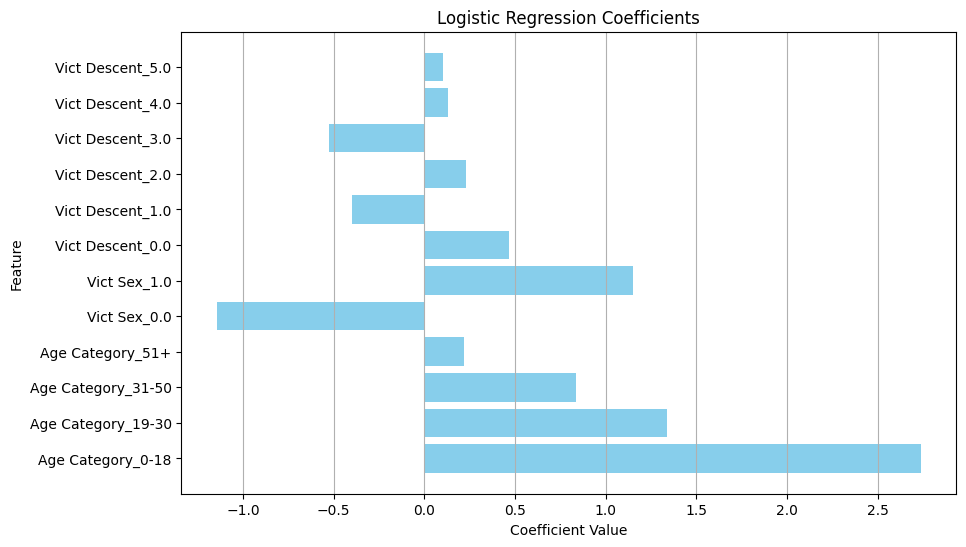

In [ ]:
import matplotlib.pyplot as plt

# Plot the feature coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_coefficients['Feature'], feature_coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.grid(axis='x')
plt.show()

In [ ]:

property_and_violent_crimes = [310, 320, 510, 520, 433, 330, 331, 410, 420, 421, 350, 351, 352, 353, 450, 451, 452, 453, 341, 343, 345,
 440, 441, 442, 443, 444, 445, 470, 471, 472, 473, 474, 475, 480, 485, 487, 491, 110, 113, 121, 122, 815, 820, 821, 210, 220, 230, 231, 235, 236, 250, 251, 761, 926,
 435, 436, 437, 622, 623, 624, 625, 626, 627, 647, 763, 928, 930]

violent_crimes = [110, 113, 121, 122, 815, 820, 821, 210, 220, 230, 231, 235, 236, 250, 251, 761, 926,
 435, 436, 437, 622, 623, 624, 625, 626, 627, 647, 763, 928, 930]

violence_victim_df = df.copy()
violence_victim_df = violence_victim_df[['Vict Age', 'Vict Sex', 'Vict Descent', 'Crm Cd', 'Crm Cd Desc']].reset_index(drop=True)

violence_victim_df = violence_victim_df[violence_victim_df['Crm Cd'].isin(property_and_violent_crimes)]

violence_victim_df['violent crime'] = violence_victim_df['Crm Cd'].isin(violent_crimes).astype(int)

violence_victim_df['Vict Sex'] = violence_victim_df['Vict Sex'].map(sex_mapping)
violence_victim_df['Vict Sex'] = violence_victim_df['Vict Sex'].where(violence_victim_df['Vict Sex'].isin([0, 1]), np.nan)
violence_victim_df.dropna(subset=['Vict Sex'], inplace=True)

violence_victim_df['Vict Descent'] = violence_victim_df['Vict Descent'].map(descent_mapping)
violence_victim_df = violence_victim_df[violence_victim_df['Vict Descent'] != 18]
violence_victim_df.dropna(subset=['Vict Descent'], inplace=True)

violence_victim_df['Age Category'] = pd.cut(violence_victim_df['Vict Age'], bins=[0, 18, 30, 50, np.inf], labels=['0-18', '19-30', '31-50', '51+'])

violence_victim_df.drop(columns=['Vict Age'], inplace=True)


<ipython-input-14-9a6a2d1b3f8b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violence_victim_df['violent crime'] = violence_victim_df['Crm Cd'].isin(violent_crimes).astype(int)
<ipython-input-14-9a6a2d1b3f8b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violence_victim_df['Vict Sex'] = violence_victim_df['Vict Sex'].map(sex_mapping)
<ipython-input-14-9a6a2d1b3f8b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

what demographic features make someone more likely to be victim of a violent crime rather than property crime

In [ ]:

X = violence_victim_df[['Age Category', 'Vict Sex', 'Vict Descent']]
y = violence_victim_df['violent crime']

X = pd.get_dummies(X, columns=['Age Category', 'Vict Sex', 'Vict Descent'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg1 = LogisticRegression()
logreg1.fit(X_train, y_train)

y_pred = logreg1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

coefficients = logreg1.coef_[0]

feature_names = X.columns
feature_coefficients1 = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(feature_coefficients1)


Accuracy: 0.6732426130081123

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.52      0.59     41768
           1       0.66      0.80      0.73     49575

    accuracy                           0.67     91343
   macro avg       0.68      0.66      0.66     91343
weighted avg       0.68      0.67      0.67     91343

               Feature  Coefficient
0    Age Category_0-18     2.116897
1   Age Category_19-30     0.424221
2   Age Category_31-50     0.312186
3     Age Category_51+     0.261713
4         Vict Sex_0.0    -0.435851
5         Vict Sex_1.0    -0.269034
6     Vict Descent_0.0     0.067229
7     Vict Descent_1.0     1.410511
8     Vict Descent_2.0    -0.474195
9     Vict Descent_3.0     1.323666
10    Vict Descent_4.0    -1.488487
11    Vict Descent_5.0    -1.543608


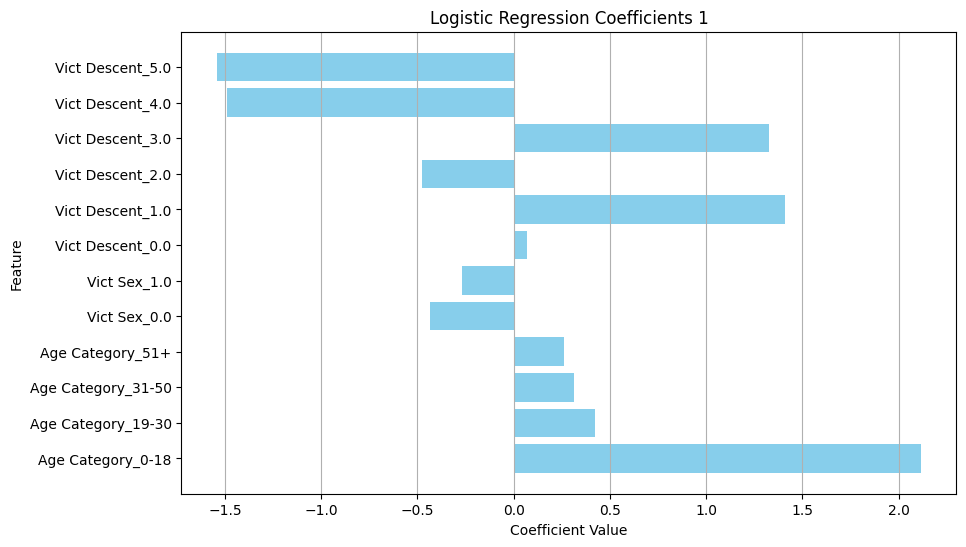

In [ ]:
# Plot the feature coefficients
# lower accuracy
plt.figure(figsize=(10, 6))
plt.barh(feature_coefficients1['Feature'], feature_coefficients1['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients 1')
plt.grid(axis='x')
plt.show()

In [ ]:
# filled nans with -1

property_crimes_people_df = property_crimes_df.copy()
property_crimes_people_df['Age Category'] = pd.cut(property_crimes_people_df['Vict Age'], bins=[0, 18, 30, 50, np.inf], labels=['0-18', '19-30', '31-50', '51+'])
property_crimes_people_df['Vict Age'].fillna(-1, inplace=True)

property_crimes_people_df['Vict Age'] = property_crimes_people_df['Vict Age'].replace(0, -1)

property_crimes_people_df['Vict Sex'] = property_crimes_people_df['Vict Sex'].map(sex_mapping)
property_crimes_people_df['Vict Sex'].fillna(-1, inplace=True)


property_crimes_people_df['Vict Descent'] = property_crimes_people_df['Vict Descent'].map(descent_mapping)
property_crimes_people_df = property_crimes_people_df[property_crimes_people_df['Vict Descent'] != 18]
property_crimes_people_df['Vict Descent'].fillna(-1, inplace=True)

property_crimes_people_df['Age Category'] = property_crimes_people_df['Age Category'].astype(str)
property_crimes_people_df['Age Category'].replace('nan', -1, inplace=True)
property_crimes_people_df['Age Category'] = property_crimes_people_df['Age Category'].astype('category')

property_crimes_people_df.drop(columns=['Crm Cd Desc', 'Vict Age', 'Crm Cd'], inplace=True)

# # for when i kept cars in the data set?
property_crimes_people_df['Person Victim'] = property_crimes_people_df['Vict Sex']

# # victim is person vs property lol
people_mapping = {0: 1, 1: 1, -1: 0}

property_crimes_people_df['Person Victim'] = property_crimes_people_df['Person Victim'].map(people_mapping)

# # # dropping negative ones to see if diff
# property_crimes_people_df = property_crimes_people_df.loc[(property_crimes_people_df != -1).all(axis=1)]


property_crimes_people_df.reset_index(inplace=True, drop=True)

X = property_crimes_people_df[['Age Category', 'Vict Sex', 'Vict Descent']]
# 1 for all values
y = property_crimes_people_df['Person Victim']
property_crimes_people_df

#do with random forest instead

# stolen vehicles vs. location (do later)


<ipython-input-54-c01d7cc86ef5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_crimes_people_df['Vict Descent'].fillna(-1, inplace=True)
<ipython-input-54-c01d7cc86ef5>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_crimes_people_df['Age Category'] = property_crimes_people_df['Age Category'].astype(str)
<ipython-input-54-c01d7cc86ef5>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

,Vict Sex,Vict Descent,Age Category,Person Victim
0,-1.0,-1.0,-1,0
1,1.0,1.0,51+,1
2,1.0,0.0,51+,1
3,-1.0,-1.0,-1,0
4,0.0,2.0,19-30,1
...,...,...,...,...
329282,1.0,3.0,51+,1
329283,-1.0,-1.0,-1,0
329284,-1.0,-1.0,-1,0
329285,0.0,0.0,51+,1


In [ ]:
X = pd.get_dummies(X, columns=['Age Category', 'Vict Sex', 'Vict Descent'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg2 = LogisticRegression()
logreg2.fit(X_train, y_train)

y_pred = logreg2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

coefficients = logreg2.coef_[0]

feature_names = X.columns
feature_coefficients2 = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(feature_coefficients2)

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23695
           1       1.00      1.00      1.00     42163

    accuracy                           1.00     65858
   macro avg       1.00      1.00      1.00     65858
weighted avg       1.00      1.00      1.00     65858

               Feature  Coefficient
0      Age Category_-1    -1.563817
1    Age Category_0-18     0.041097
2   Age Category_19-30     0.219106
3   Age Category_31-50     0.557887
4     Age Category_51+     0.745866
5        Vict Sex_-1.0    -9.239696
6         Vict Sex_0.0     4.856258
7         Vict Sex_1.0     4.383576
8    Vict Descent_-1.0    -3.387866
9     Vict Descent_0.0     1.106177
10    Vict Descent_1.0     0.707964
11    Vict Descent_2.0     0.514759
12    Vict Descent_3.0     1.013030
13    Vict Descent_4.0     0.031601
14    Vict Descent_5.0     0.014473


of all property crimes - given that the victim is a person (not property) which features are most important - this part i may have to drop


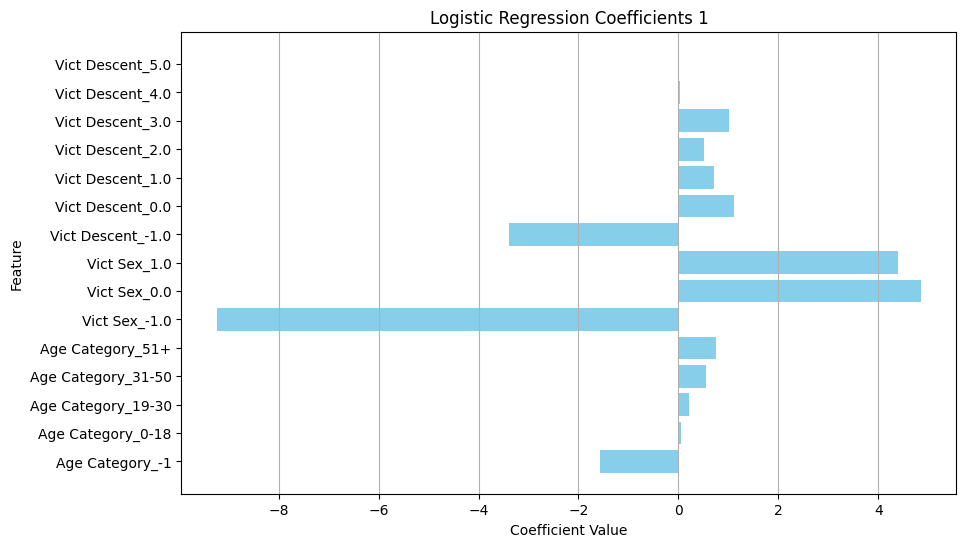

In [ ]:
# Plot the feature coefficients
# lower accuracy
plt.figure(figsize=(10, 6))
plt.barh(feature_coefficients2['Feature'], feature_coefficients2['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients 1')
plt.grid(axis='x')
plt.show()

# when filtering out all non human victims (cars), main factor is still vict sex

In [ ]:
# gta and location k clister

In [ ]:
# crime vs time

time_analysis_df = df.copy()
time_analysis_df

time_analysis_df['Date Rptd'] = pd.to_datetime(time_analysis_df['Date Rptd'])
time_analysis_df['DATE OCC'] = pd.to_datetime(time_analysis_df['DATE OCC'])
time_analysis_df['Time Difference'] = (time_analysis_df['Date Rptd'] - time_analysis_df['DATE OCC']).dt.days
#time_analysis_df = time_analysis_df[time_analysis_df['Time Difference'] > 7]

time_analysis_df = time_analysis_df[(time_analysis_df['Crm Cd'].isin([236, 626]))]
time_analysis_df.drop(columns=['Crm Cd 1','Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Status', 'Crm Cd Desc', 'DR_NO', 'AREA', 'AREA NAME', 'Weapon Desc',
                               'Weapon Used Cd', 'Premis Cd', 'Premis Desc', 'Mocodes', 'LOCATION', 'Cross Street'], inplace=True)

time_analysis_df['Vict Sex'] = time_analysis_df['Vict Sex'].map(sex_mapping)
time_analysis_df['Vict Sex'] = time_analysis_df['Vict Sex'].where(time_analysis_df['Vict Sex'].isin([0, 1]), np.nan)
time_analysis_df.dropna(subset=['Vict Sex'], inplace=True)

time_analysis_df['Vict Descent'] = time_analysis_df['Vict Descent'].map(descent_mapping)
time_analysis_df = time_analysis_df[time_analysis_df['Vict Descent'] != 18]
time_analysis_df['Vict Descent'].fillna(-1, inplace=True)

time_analysis_df['Age Category'] = pd.cut(time_analysis_df['Vict Age'], bins=[0, 18, 30, 50, np.inf], labels=['0-18', '19-30', '31-50', '51+'])

#time_analysis_df.drop(columns=['Vict Age'], inplace=True)
age_mapping = {'0-18' : 0, '19-30' : 1, '31-50' : 2, '51+' : 3}
code_mapping = {236 : 0, 626 : 1}

time_analysis_df['Age Category'] = time_analysis_df['Age Category'].map(age_mapping)
time_analysis_df['Crm Cd'] = time_analysis_df['Crm Cd'].map(code_mapping)
time_analysis_df['Solved'] = time_analysis_df['Status Desc'] != 'Invest Cont'

time_analysis_df.dropna(inplace=True)
time_analysis_df
#dv 236 626

<ipython-input-23-8a05543ace5e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_analysis_df.drop(columns=['Crm Cd 1','Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Status', 'Crm Cd Desc', 'DR_NO', 'AREA', 'AREA NAME', 'Weapon Desc',
<ipython-input-23-8a05543ace5e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_analysis_df['Vict Sex'] = time_analysis_df['Vict Sex'].map(sex_mapping)
<ipython-input-23-8a05543ace5e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,Date Rptd,DATE OCC,TIME OCC,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Vict Sex,Vict Descent,Status Desc,LAT,LON,Time Difference,Age Category,Solved
63,2023-11-27,2020-09-13,2100,829,2,1,42,1.0,3,Invest Cont,34.0596,-118.4233,1170,2,False
91,2022-07-06,2020-06-30,1400,396,2,1,25,1.0,1,Invest Cont,34.0055,-118.2915,736,1,False
102,2023-05-22,2020-05-08,1200,1548,2,1,29,1.0,3,Adult Other,34.1670,-118.3686,1109,1,True
117,2023-08-16,2020-08-27,2100,132,1,0,59,1.0,2,Adult Other,34.0570,-118.2508,1084,3,True
152,2022-07-05,2020-03-01,1200,1001,2,1,43,0.0,3,Adult Arrest,34.2204,-118.5579,856,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918384,2024-03-17,2024-03-17,230,2005,2,1,26,0.0,3,Invest Cont,34.0763,-118.3012,0,1,False
918390,2024-01-06,2024-01-06,920,2039,1,0,22,1.0,3,Adult Arrest,34.0608,-118.2842,0,1,True
918398,2024-01-18,2024-01-10,1900,466,1,0,46,1.0,3,Invest Cont,34.0436,-118.2051,8,2,False
918401,2024-02-20,2024-02-20,2100,2014,2,1,65,1.0,3,Adult Other,34.0726,-118.3029,0,3,True


time difference ended up having little to no pattern

victim sex vs age category/crm cd/descent - only analyzing domestic violence cases

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

time_analysis_df.reset_index(inplace=True, drop=True)

X = time_analysis_df[['Age Category', 'Crm Cd', 'Vict Descent']]

y = time_analysis_df['Vict Sex']
# y = time_analysis_df['Time Difference'] mse of 2000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# try forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.17556468855552754


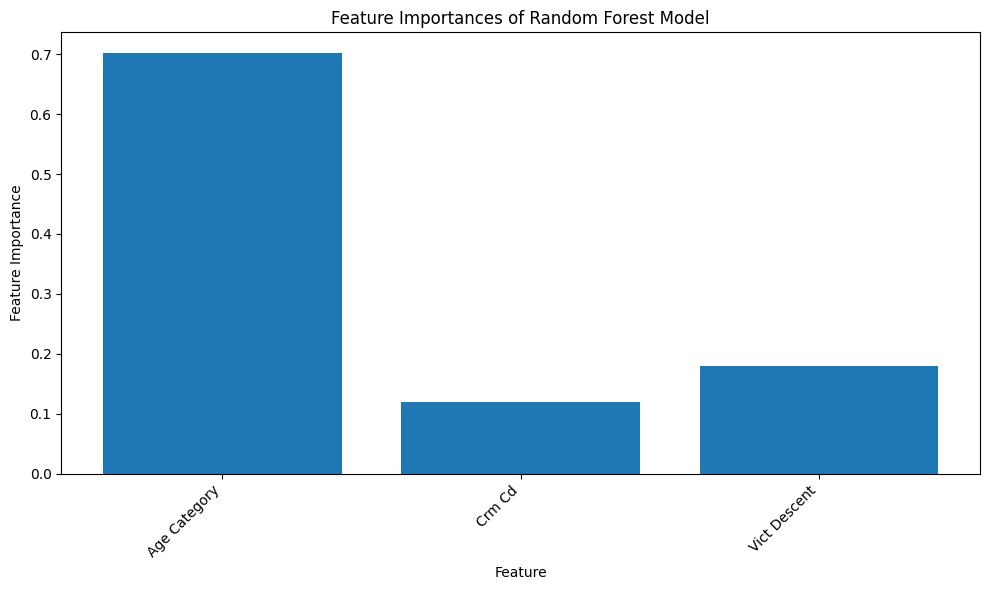

In [ ]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Visualize feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=X.columns)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importances of Random Forest Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

what features impact most the probability of a crime being solved
- this is just for domestic violence still
- maybe do for all violent crimes and compare to all property crimes

In [ ]:
time_analysis_df.reset_index(inplace=True, drop=True)

X = time_analysis_df[['Age Category', 'Crm Cd', 'Vict Descent', 'Vict Sex']]

y = time_analysis_df['Solved']
# y = time_analysis_df['Time Difference'] mse of 2000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# try forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.21907397219412203


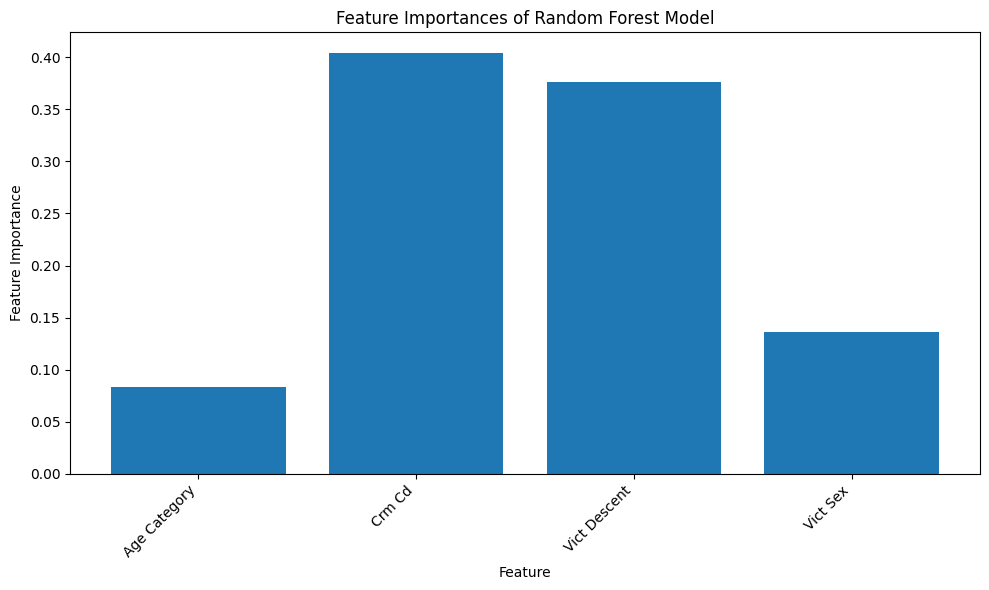

In [ ]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Visualize feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=X.columns)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importances of Random Forest Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

bc victim descent seems to be most important feature - per random forest, we ran log reg


In [ ]:
# run log reg on solved (for domestic violence)
X = time_analysis_df[['Vict Descent']]
y = time_analysis_df['Solved']
X = pd.get_dummies(X, columns=['Vict Descent'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg2 = LogisticRegression()
logreg2.fit(X_train, y_train)

y_pred = logreg2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

coefficients = logreg2.coef_[0]

feature_names = X.columns
feature_coefficients2 = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(feature_coefficients2)

Accuracy: 0.6579357083982049

Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00      3735
        True       0.66      1.00      0.79      7184

    accuracy                           0.66     10919
   macro avg       0.33      0.50      0.40     10919
weighted avg       0.43      0.66      0.52     10919

          Feature  Coefficient
0  Vict Descent_1    -0.575711
1  Vict Descent_2     0.011082
2  Vict Descent_3    -0.227896
3  Vict Descent_4     0.007354
4  Vict Descent_5    -0.001722


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


log ref on solved vs all crimes in 2020

also might as well do on all crimes tbh (2020-2024)

In [ ]:
#run log reg on solved vs all crimes in 2020
violent_crimes = [110, 113, 121, 122, 815, 820, 821, 210, 220, 230, 231, 235, 236, 250, 251, 761, 926,
 435, 436, 437, 622, 623, 624, 625, 626, 627, 647, 763, 928, 930]
violent_crimes_df = df[df['Crm Cd'].isin(violent_crimes)]

property_crimes = [310, 320, 510, 520, 433, 330, 331, 410, 420, 421, 350, 351, 352, 353, 450, 451, 452, 453, 341, 343, 345,
 440, 441, 442, 443, 444, 445, 470, 471, 472, 473, 474, 475, 480, 485, 487, 491]
property_crimes_df = df[df['Crm Cd'].isin(property_crimes)]

solved_df = violent_crimes_df.copy()

solved_df = property_crimes_df.copy()

In [ ]:
solved_df['Solved'] = solved_df['Status Desc'] != 'Invest Cont'

solved_df['Vict Sex'] = solved_df['Vict Sex'].map(sex_mapping)
solved_df['Vict Sex'] = solved_df['Vict Sex'].where(solved_df['Vict Sex'].isin([0, 1]), np.nan)
solved_df.dropna(subset=['Vict Sex'], inplace=True)

solved_df['Vict Descent'] = solved_df['Vict Descent'].map(descent_mapping)
solved_df = solved_df[solved_df['Vict Descent'] != 18]
solved_df['Vict Descent'].fillna(-1, inplace=True)

solved_df['Age Category'] = pd.cut(solved_df['Vict Age'], bins=[0, 18, 30, 50, np.inf], labels=['0-18', '19-30', '31-50', '51+'])

age_mapping = {'0-18' : 0, '19-30' : 1, '31-50' : 2, '51+' : 3}
code_mapping = {236 : 0, 626 : 1}

solved_df['Age Category'] = solved_df['Age Category'].map(age_mapping)
solved_df['Solved'] = solved_df['Status Desc'] != 'Invest Cont'

solved_df['Date Rptd'] = pd.to_datetime(solved_df['Date Rptd'])
solved_df['DATE OCC'] = pd.to_datetime(solved_df['DATE OCC'])
solved_df['Year'] = solved_df['DATE OCC'].dt.year

solved_df = solved_df[solved_df['Year'] == 2020]

solved_df.drop(columns=['Crm Cd 1','Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Status', 'Crm Cd Desc', 'DR_NO', 'AREA', 'AREA NAME', 'Weapon Desc',
                               'Weapon Used Cd', 'Premis Cd', 'Premis Desc', 'Mocodes', 'LOCATION', 'Cross Street'], inplace=True)
solved_df[['Age Category', 'Vict Descent', 'Vict Sex']].dropna(inplace=True)
solved_df.reset_index(inplace=True, drop=True)
solved_df

<ipython-input-32-70ef2148a49a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solved_df.drop(columns=['Crm Cd 1','Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Status', 'Crm Cd Desc', 'DR_NO', 'AREA', 'AREA NAME', 'Weapon Desc',
<ipython-input-32-70ef2148a49a>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solved_df[['Age Category', 'Vict Descent', 'Vict Sex']].dropna(inplace=True)


,Date Rptd,DATE OCC,TIME OCC,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Vict Sex,Vict Descent,Status Desc,LAT,LON,Solved,Age Category,Year
0,2022-02-03,2020-02-11,1200,747,1,341,57,1.0,1.0,Invest Cont,34.0608,-118.3359,False,3,2020
1,2023-04-25,2020-01-01,800,801,1,341,56,1.0,0.0,Invest Cont,34.0677,-118.5520,False,3,2020
2,2023-05-09,2020-05-08,2023,1101,1,330,20,0.0,2.0,Invest Cont,34.1192,-118.3004,False,1,2020
3,2022-04-27,2020-07-07,1200,585,1,341,64,0.0,3.0,Invest Cont,33.7234,-118.2968,False,3,2020
4,2023-11-12,2020-11-12,1430,1123,1,440,27,0.0,0.0,Invest Cont,34.1142,-118.2652,False,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45472,2020-09-23,2020-08-20,1735,1065,1,341,42,1.0,0.0,Invest Cont,34.1670,-118.5220,False,2,2020
45473,2020-07-18,2020-07-18,1450,2143,1,442,50,0.0,0.0,Adult Arrest,34.1883,-118.6274,True,2,2020
45474,2020-07-02,2020-07-01,1500,721,1,330,43,0.0,0.0,Invest Cont,34.0761,-118.3772,False,2,2020
45475,2020-05-17,2020-05-14,1400,854,1,310,40,0.0,0.0,Invest Cont,34.0483,-118.4470,False,2,2020


In [ ]:
X = solved_df[['Vict Descent']]
y = solved_df['Solved']
X = pd.get_dummies(X, columns=['Vict Descent'], drop_first= True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg3 = LogisticRegression()
logreg3.fit(X_train, y_train)

y_pred = logreg3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

coefficients = logreg3.coef_[0]

feature_names = X.columns
feature_coefficients3 = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(feature_coefficients3)

Accuracy: 0.9270008795074758

Classification Report:
              precision    recall  f1-score   support

       False       0.93      1.00      0.96      8432
        True       0.00      0.00      0.00       664

    accuracy                           0.93      9096
   macro avg       0.46      0.50      0.48      9096
weighted avg       0.86      0.93      0.89      9096

            Feature  Coefficient
0  Vict Descent_0.0     0.404894
1  Vict Descent_1.0     0.466107
2  Vict Descent_2.0    -0.212366
3  Vict Descent_3.0     0.511373
4  Vict Descent_4.0    -0.472213
5  Vict Descent_5.0    -0.701121


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#

In [ ]:
# hollywood vs location/weapon/premis etc etc

#bifurecate the data b/w holy and not

In [ ]:
#gta vs location k cluster

location_df = df.copy()


In [ ]:
location_df = location_df[['Crm Cd', 'LAT', 'LON']]

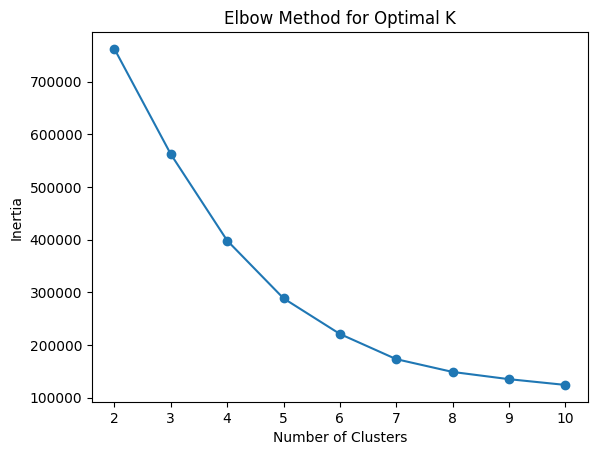

In [ ]:
from sklearn.cluster import KMeans


location_df.dropna(inplace=True)

scaler = StandardScaler()

location_df = location_df[(location_df['LAT'] >= 33) & (location_df['LAT'] <= 35) &
                                    (location_df['LON'] >= -119) & (location_df['LON'] <= -117)]

scaled_location_data = scaler.fit_transform(location_df[['LAT', 'LON']])

# finding k
distortions = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_location_data)
    distortions.append(kmeans.inertia_)

plt.plot(range(2, 11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

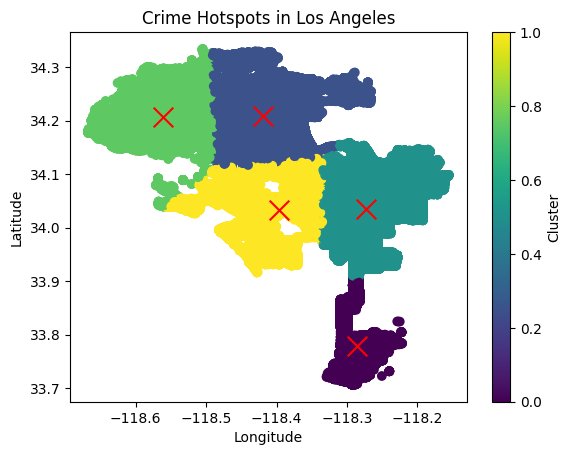

In [ ]:
k = 5
# or 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(scaled_location_data)

location_df['Cluster'] = kmeans.labels_

cluster_centers = kmeans.cluster_centers_
cluster_centers_original = scaler.inverse_transform(cluster_centers)

plt.scatter(location_df['LON'], location_df['LAT'], c=location_df['Cluster'], cmap='viridis')

plt.scatter(cluster_centers_original[:, 1], cluster_centers_original[:, 0], c='red', marker='x', s=200, label='Cluster Centers')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime Hotspots in Los Angeles')
plt.colorbar(label='Cluster')
plt.show()

<ipython-input-39-9c6ec6c024fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gta_location_df.drop(columns='Cluster', inplace=True)


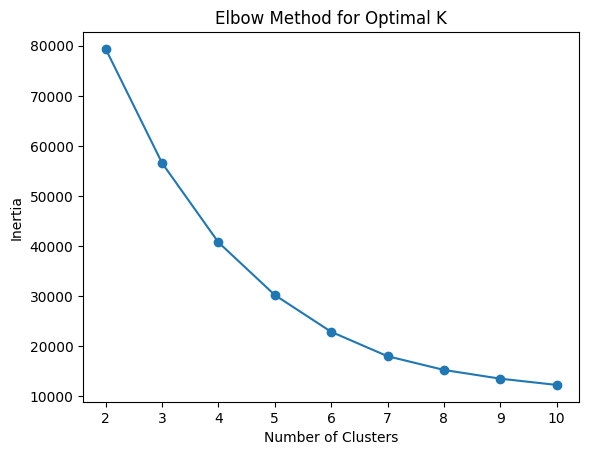

In [ ]:
gta_location_df = location_df[location_df['Crm Cd'] == 510]

gta_location_df.drop(columns='Cluster', inplace=True)
scaled_gta_data = scaler.fit_transform(gta_location_df[['LAT', 'LON']])


# finding k
distortions = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_gta_data)
    distortions.append(kmeans.inertia_)

plt.plot(range(2, 11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


<ipython-input-41-935cbad855a4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gta_location_df['Cluster'] = kmeans.labels_


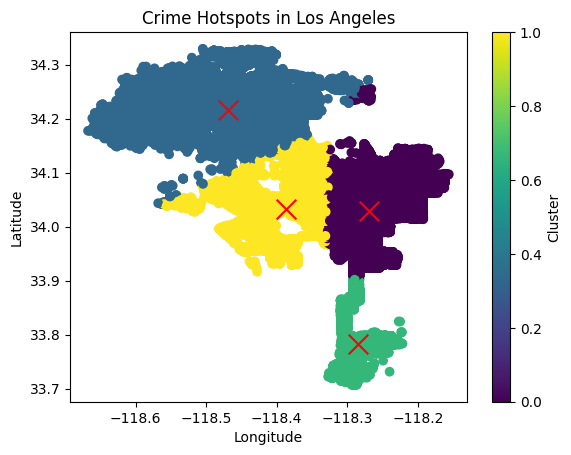

In [ ]:
k = 4
# or 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(scaled_gta_data)

gta_location_df['Cluster'] = kmeans.labels_


cluster_centers = kmeans.cluster_centers_
cluster_centers_original = scaler.inverse_transform(cluster_centers)


plt.scatter(gta_location_df['LON'], gta_location_df['LAT'], c=gta_location_df['Cluster'], cmap='viridis')
plt.scatter(cluster_centers_original[:, 1], cluster_centers_original[:, 0], c='red', marker='x', s=200, label='Cluster Centers')


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime Hotspots in Los Angeles')
plt.colorbar(label='Cluster')
plt.show()

<ipython-input-48-8b316caa70f7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gta_location_0_df['Cluster'] = kmeans.labels_


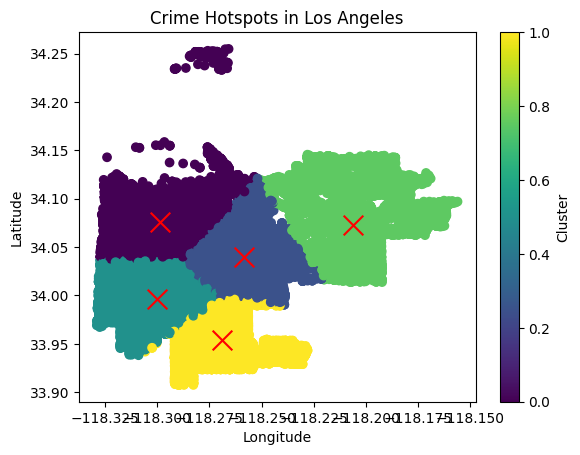

In [ ]:
cluster_centers_original

# hollywood coords: 34.0907, -118.3266
# hollywood = purple cluster = 0

gta_location_0_df = gta_location_df[gta_location_df['Cluster'] == 0]

scaled_gta_data_0 = scaler.fit_transform(gta_location_0_df[['LAT', 'LON']])


k = 5

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(scaled_gta_data_0)

gta_location_0_df['Cluster'] = kmeans.labels_

cluster_centers = kmeans.cluster_centers_
cluster_centers_original = scaler.inverse_transform(cluster_centers)

plt.scatter(gta_location_0_df['LON'], gta_location_0_df['LAT'], c=gta_location_0_df['Cluster'], cmap='inferno')
plt.scatter(cluster_centers_original[:, 1], cluster_centers_original[:, 0], c='red', marker='x', s=200, label='Cluster Centers')


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime Hotspots in Los Angeles')
plt.colorbar(label='Cluster')
plt.show()

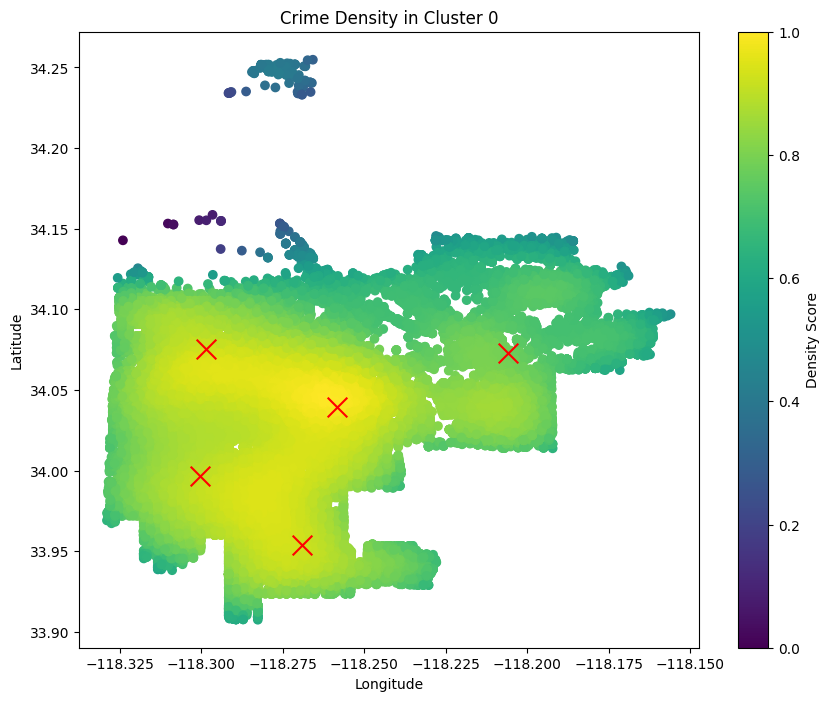

In [ ]:
# gta_location_0_0_df = gta_location_0_df[gta_location_0_df['Cluster'] == 0]
# gta_location_0_0_df


#density??

from sklearn.neighbors import KernelDensity

kde = KernelDensity(bandwidth=0.01)
#zooming in on downtown??
kde.fit(gta_location_0_df[['LAT', 'LON']])

density_scores = kde.score_samples(gta_location_0_df[['LAT', 'LON']])

# Normalize density scores if necessary




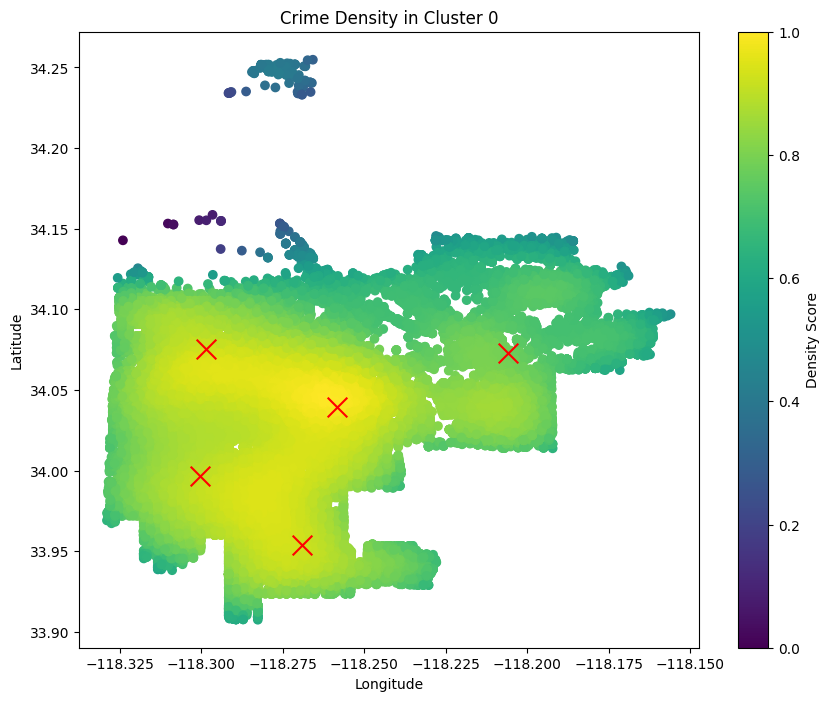

In [ ]:

# Visualize Density Scores
plt.figure(figsize=(10, 8))
plt.scatter(gta_location_0_df['LON'], gta_location_0_df['LAT'], c=density_scores, cmap='plasma')
plt.scatter(cluster_centers_original[:, 1], cluster_centers_original[:, 0], c='red', marker='x', s=200, label='Cluster Centers')
plt.colorbar(label='Density Score')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime Density in Cluster 0')
plt.show()

# hollywood coords: 34.0907, -118.3266

# perhaps analyze each cluster center

In [ ]:

top_areas_df = df.copy()
unique_areas = top_areas_df.groupby('AREA')['AREA NAME'].unique()
area_counts = top_areas_df['AREA'].value_counts().reset_index()
area_counts.columns = ['AREA', 'count']


unique_values = df.groupby('Crm Cd')['Crm Cd Desc'].unique()
crime_counts = df['Crm Cd'].value_counts().reset_index()

unique_areas = pd.merge(unique_areas, area_counts, on='AREA', how='left').sort_values(by='count', ascending=False)
unique_areas.head(5).reset_index(drop=True)

#zoom in on yellow spot and do demographic anal


,AREA,AREA NAME,count
0,1,[Central],62523
1,12,[77th Street],57392
2,14,[Pacific],53582
3,3,[Southwest],51643
4,6,[Hollywood],48357


In [ ]:
# compare demos of highly dense areas

In [ ]:
cluster_centers_original
# index 1 zoom in

array([[  34.07556639, -118.29857754],
       [  34.03966262, -118.25846262],
       [  33.99637239, -118.30033491],
       [  34.07264577, -118.2060557 ],
       [  33.95357543, -118.26919494]])

In [ ]:
density_scores

NameError: name 'density_scores' is not defined